In [ ]:
# Install necessary libraries
!pip install -q tensorflow pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simulate synthetic customer data
np.random.seed(42)
num_samples = 1000

data = pd.DataFrame({
    'Age': np.random.randint(18, 65, num_samples),
    'Purchase_Frequency': np.random.randint(1, 20, num_samples),
    'Product_Category': np.random.randint(1, 10, num_samples),
    'Customer_Spend': np.random.normal(loc=500, scale=100, size=num_samples)
})

data.head()


,Age,Purchase_Frequency,Product_Category,Customer_Spend
0,56,13,4,639.707950
1,46,8,9,808.715515
2,32,2,7,544.878052
3,60,1,7,397.036532
4,25,5,7,484.553448


In [ ]:
# Feature selection and scaling
X = data[['Age', 'Purchase_Frequency', 'Product_Category']]
y = data['Customer_Spend']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# ANN Regression model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Training
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 273449.7188 - mae: 513.0089 - val_loss: 262155.3125 - val_mae: 499.0917
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 273621.2500 - mae: 513.2404 - val_loss: 260935.1406 - val_mae: 497.8659
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 267487.9062 - mae: 507.3895 - val_loss: 258724.6250 - val_mae: 495.6390
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 267120.8750 - mae: 506.5314 - val_loss: 254841.7656 - val_mae: 491.6997
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 260997.2969 - mae: 501.1493 - val_loss: 248532.8438 - val_mae: 485.2299
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 250031.4062 - mae: 491.1025 - val_loss: 239159.7188 - val_mae: 475.4477
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 242013.1562 - mae: 481.2280 - val_loss: 226186.4531 - val_mae: 461.5554
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 228952.8281 - mae: 468.0216

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error on test data: 15481.46


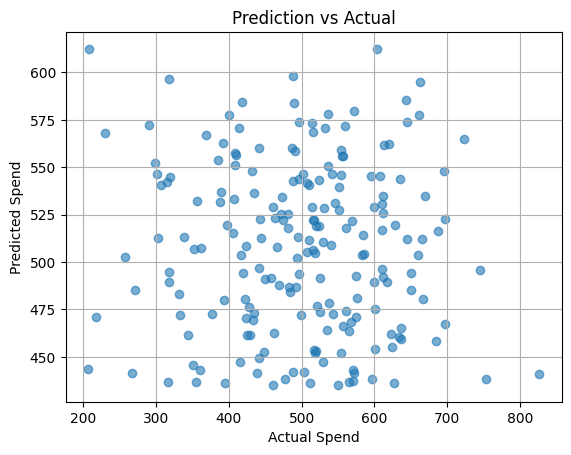

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse:.2f}")

# Plot predictions vs actual
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Spend")
plt.ylabel("Predicted Spend")
plt.title("Prediction vs Actual")
plt.grid()
plt.show()


In [ ]:
# Summary: segmenting high spenders for campaign
test_data = pd.DataFrame(X_test, columns=['Age', 'Purchase_Frequency', 'Product_Category'])
test_data['Predicted_Spend'] = y_pred

# Target customers predicted to spend more than ₹600
target_customers = test_data[test_data['Predicted_Spend'] > 600]
print(f"\nNumber of high-value customers: {len(target_customers)}")
target_customers.head()



Number of high-value customers: 2


,Age,Purchase_Frequency,Product_Category,Predicted_Spend
119,-1.629667,1.278861,-1.586083,612.226013
122,1.705865,1.461009,1.539203,612.397766


from matplotlib import pyplot as plt
_df_31['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Purchase_Frequency'].plot(kind='hist', bins=20, title='Purchase_Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Product_Category'].plot(kind='hist', bins=20, title='Product_Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Predicted_Spend'].plot(kind='hist', bins=20, title='Predicted_Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Age', y='Purchase_Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Purchase_Frequency', y='Product_Category', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Product_Category', y='Predicted_Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Purchase_Frequency']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Purchase_Frequency'}, axis=1)
              .sort_values('Purchase_Frequency', ascending=True))
  xs = counted['Purchase_Frequency']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('Purchase_Frequency', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Purchase_Frequency')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Product_Category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Product_Category'}, axis=1)
              .sort_values('Product_Category', ascending=True))
  xs = counted['Product_Category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Product_Category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Product_Category')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Predicted_Spend']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Predicted_Spend'}, axis=1)
              .sort_values('Predicted_Spend', ascending=True))
  xs = counted['Predicted_Spend']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Predicted_Spend', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted_Spend')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_42['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Purchase_Frequency'].plot(kind='line', figsize=(8, 4), title='Purchase_Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Product_Category'].plot(kind='line', figsize=(8, 4), title='Product_Category')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Predicted_Spend'].plot(kind='line', figsize=(8, 4), title='Predicted_Spend')
plt.gca().spines[['top', 'right']].set_visible(False)